In [67]:
%matplotlib notebook

In [128]:
#Does price affect rating
# h0 = price has no affect on rating
from scipy import stats
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yelpapi import YelpAPI
from yelp.client import Client
from config import api_key

In [2]:
#testing to see if it works
my_api_key = api_key
client = YelpAPI(my_api_key)
#response = client.search_query(term='food', location= 'NYC', limit=50, offset=0)
#print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
#len(response["businesses"])

In [38]:
#loop for dataset
offset = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]
yelp_clep = []
yelp_cle = []

#print(offset[i])
for i in range(0, 1000):
    response = client.search_query(location="Cleveland", limit=1, offset=i)
    yelp_cle.append(response["businesses"][0])

In [39]:
len(yelp_cle)

1000

In [40]:
df = pd.DataFrame.from_dict(yelp_cle)
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,lola-cleveland,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 41.49883, 'longitude': -81.69035}",(216) 621-5652,3191.079270,J1RDyyPxhioqm8c_fi4P4Q,https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-E...,False,"{'address1': '2058 E 4th St', 'address2': '', ...",Lola,+12166215652,$$$,4.0,980,[],https://www.yelp.com/biz/lola-cleveland?adjust...
1,townhall-cleveland-2,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 41.485492, 'longitude': -81.703914}",(216) 344-9400,2951.385340,LNsZJP6jZ11e0tDljOLPiQ,https://s3-media4.fl.yelpcdn.com/bphoto/ycqFgv...,False,"{'address1': '1909 W 25th St', 'address2': '',...",Townhall,+12163449400,$$,4.0,991,[],https://www.yelp.com/biz/townhall-cleveland-2?...
2,l-albatros-cleveland,"[{'alias': 'french', 'title': 'French'}]","{'latitude': 41.5117439550152, 'longitude': -8...",(216) 791-7880,6953.412053,SzcCJJmreMlWCsNjupdVAA,https://s3-media4.fl.yelpcdn.com/bphoto/QpVBtp...,False,"{'address1': '11401 Bellflower Rd', 'address2'...",L'Albatros,+12167917880,$$$,4.5,604,[],https://www.yelp.com/biz/l-albatros-cleveland?...
3,slymans-restaurant-cleveland,"[{'alias': 'tradamerican', 'title': 'American ...","{'latitude': 41.51286, 'longitude': -81.67125}",(216) 621-3760,4387.852814,1veVZUawy7IhIc5oDpRRQA,https://s3-media2.fl.yelpcdn.com/bphoto/rz2ST-...,False,"{'address1': '3106 Saint Clair Ave NE', 'addre...",Slyman's Restaurant,+12166213760,$$,4.5,417,[],https://www.yelp.com/biz/slymans-restaurant-cl...
4,sokolowskis-university-inn-cleveland,"[{'alias': 'polish', 'title': 'Polish'}, {'ali...","{'latitude': 41.48475, 'longitude': -81.69005}",(216) 771-9236,1942.420138,Xny0n0s98TpP82sQxfgIMQ,https://s3-media2.fl.yelpcdn.com/bphoto/F1jEYU...,False,"{'address1': '1201 University Rd', 'address2':...",Sokolowski's University Inn,+12167719236,$$,4.5,464,[],https://www.yelp.com/biz/sokolowskis-universit...


In [61]:
graph_data.count()
graph_data_clean = graph_data.dropna(how='any')
graph_data_clean.count()

price     916
rating    916
dtype: int64

In [63]:
graph_data_clean["price"].astype(str)

0      $$$
1       $$
2      $$$
3       $$
4       $$
5       $$
6       $$
7       $$
8        $
9        $
10      $$
11      $$
12      $$
13      $$
14       $
15       $
16       $
17     $$$
18      $$
19     $$$
20       $
21      $$
22      $$
23     $$$
24      $$
25      $$
26      $$
27     $$$
28     $$$
29      $$
      ... 
963      $
965      $
966     $$
967      $
968      $
969     $$
971      $
973      $
974     $$
975     $$
976     $$
977     $$
978      $
979     $$
982      $
983      $
985     $$
986     $$
987      $
988      $
989      $
990     $$
991      $
992      $
993      $
994      $
995      $
996      $
997      $
999     $$
Name: price, Length: 916, dtype: object

In [64]:
graph_data_clean['price_length'] = graph_data_clean['price'].apply(len)
graph_data_clean

C:\Users\titus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,price,rating,price_length
0,$$$,4.0,3
1,$$,4.0,2
2,$$$,4.5,3
3,$$,4.5,2
4,$$,4.5,2
5,$$,4.0,2
6,$$,4.0,2
7,$$,4.0,2
8,$,4.0,1
9,$,4.0,1


In [76]:
new_df = graph_data_clean[['price_length', 'rating']]
new_df = new_df.rename(index=str, columns={"price_length": "price"})

<IPython.core.display.Javascript object>


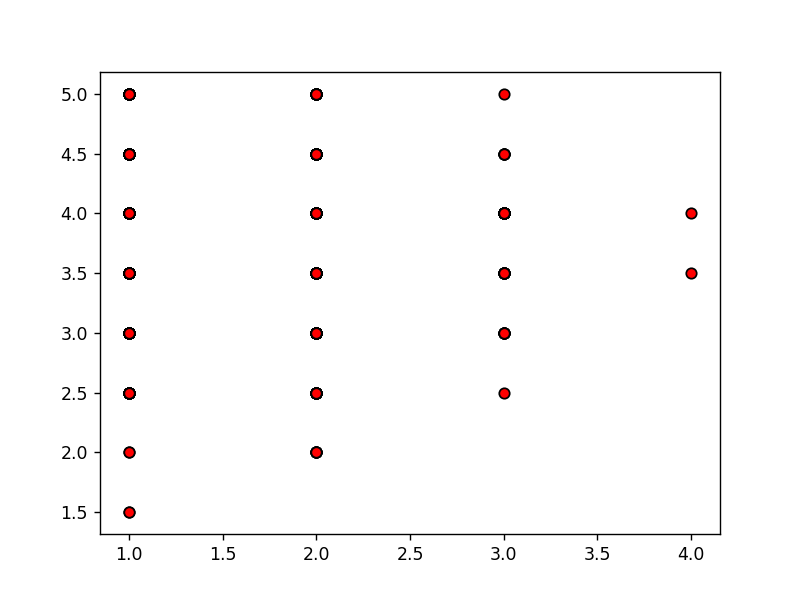

In [80]:
x_limit = 4

x_axis = new_df["price"]

y_axis = new_df["rating"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")

<IPython.core.display.Javascript object>


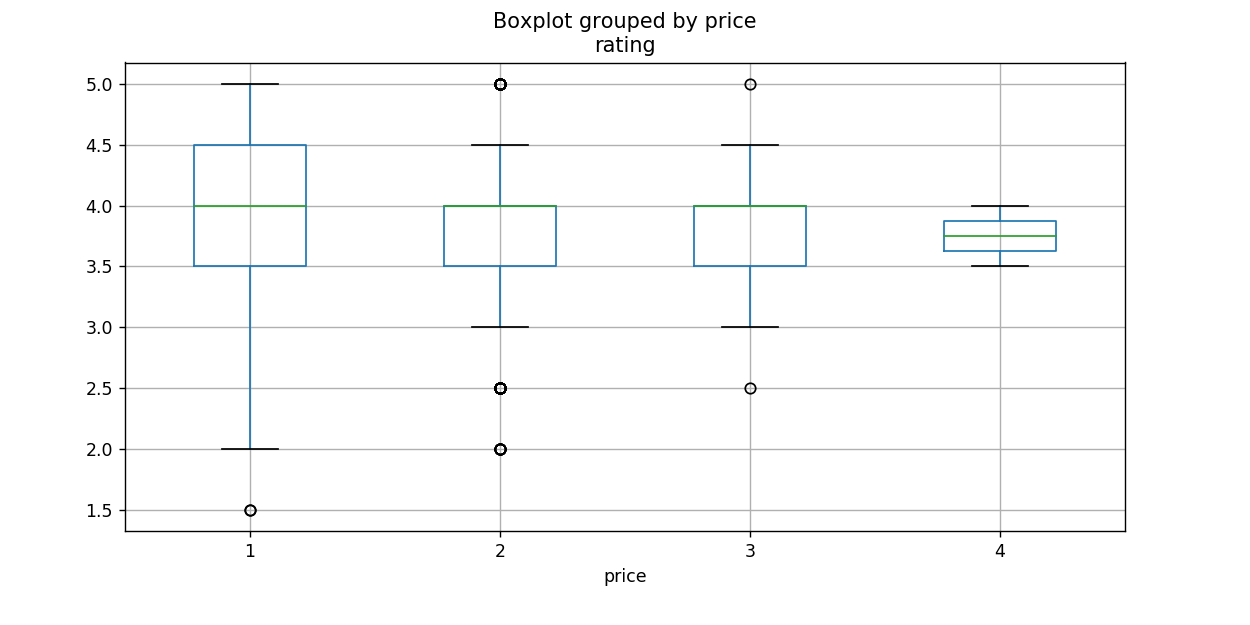

In [86]:
new_df.boxplot("rating", by="price", figsize=(10, 5))

In [90]:
group1 = new_df[new_df["price"] == 1]["rating"]
group2 = new_df[new_df["price"] == 2]["rating"]
group3 = new_df[new_df["price"] == 3]["rating"]
group4 = new_df[new_df["price"] == 4]["rating"]

In [91]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=0.8661337463567835, pvalue=0.45816872413662013)

In [92]:
# since our p-value is 0.45, which is greater than .05, we will accept our null hypothesis, 
# so, price does not have an effect on rating.

0.55

In [105]:
price_counts = new_df["price"].value_counts()
price_counts

2    455
1    413
3     46
4      2
Name: price, dtype: int64

In [126]:
four_star = new_df[new_df['rating']==4.0]
four_star.head()

,price,rating
0,3,4.0
1,2,4.0
5,2,4.0
6,2,4.0
7,2,4.0


In [127]:
%pwd

'C:\\Users\\titus\\Documents\\GitHub\\group_project_yelp'